<a href="https://colab.research.google.com/github/A01302935/Proyecto-Integrador-Equipo-19/blob/Avance-3/Avance3_19Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

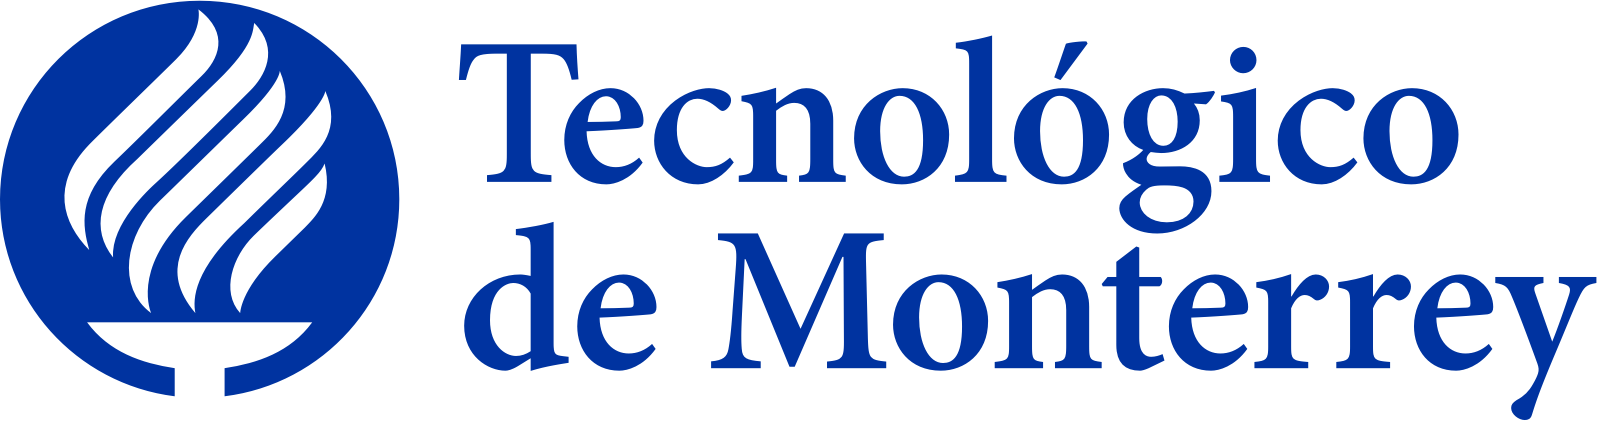
## Proyecto Integrador (Grupo 10)
## Avance 3. Baseline
## Equipo 19
### Alumnos:

- **[A01302935]**  David Mireles Samaniego
- **[A00618978]**  Angel Rodríguez Cardenas



### **OBJETIVOS**
3.1 Establecer las medidas de calidad del modelo de aprendizaje automático.

3.2 Proporcionar un marco de referencia para evaluar y mejorar modelos más avanzados.

In [ ]:
#,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,

### **INSTRUCCIONES**

Este avance consiste en construir un modelo de referencia que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podría indicar que el problema es intrínsecamente difícil o que los datos no contienen suficiente información para predecir el objetivo. De lo contrario, el baseline podría como una solución mínima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.

Un baseline facilita también la gestión de expectativas, tanto dentro del equipo como con los stakeholders, pues proporciona una comprensión inicial de lo que se puede lograr con métodos simples antes de invertir tiempo y recursos en enfoques más complejos.

Las siguientes son algunas de las preguntas que deberán abordar durante esta fase:

In [ ]:
#____________________________________________________________________________________________________________________________________________________
#.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
#.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-

### **1.- ¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?**

In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Para utilizar **MediaPipe Face Landmarker** en un análisis de rostros por visión por computadora, puedes considerar varios algoritmos como **baseline** para predecir las variables objetivo. La elección depende del tipo de variable que deseas predecir (ejemplo: emociones, poses, identificación, etc.). Algunas opciones son:  

### **1. Regresión Lineal / Logística**  
   - **Uso**: Si las variables objetivo son continuas (ej. posición, ángulos de inclinación).  
   - **Ventajas**: Simple, fácil de interpretar y entrenar rápidamente.  
   - **Ejemplo**: Predecir la inclinación de la cabeza en función de los landmarks faciales.  

### **2. k-Nearest Neighbors (k-NN)**  
   - **Uso**: Para clasificación de expresiones faciales o identificación de individuos.  
   - **Ventajas**: No requiere entrenamiento extenso, fácil de implementar.  
   - **Ejemplo**: Clasificar emociones con base en distancias entre landmarks.  

### **3. Random Forest**  
   - **Uso**: Para predicción de atributos faciales complejos (ej. género, edad).  
   - **Ventajas**: Maneja datos no lineales y es más robusto que modelos lineales.  
   - **Ejemplo**: Determinar la edad aproximada a partir de landmarks faciales.  

### **4. Support Vector Machines (SVM)**  
   - **Uso**: Para clasificación de expresiones faciales o estados de ánimo.  
   - **Ventajas**: Buen desempeño en espacios de alta dimensión.  
   - **Ejemplo**: Clasificar entre rostro "feliz" y "triste".  

### **5. Red Neuronal Pequeña (MLP - Multilayer Perceptron)**  
   - **Uso**: Para modelar relaciones más complejas en los landmarks.  
   - **Ventajas**: Puede capturar no linealidades en los datos.  
   - **Ejemplo**: Predecir emociones con mayor precisión que SVM.  

** Recomendación:**  
Para un **baseline simple**, puedes comenzar con **Regresión Lineal/Logística o k-NN** dependiendo de si la variable objetivo es continua o categórica. Luego, podrías probar **Random Forest o SVM** para mejorar el rendimiento.

### **Importamos la Libreria**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import os

# Check if the file exists and print a message instead of listing directory contents
if os.path.exists("/content/olivetti_faces.npy"):
    print("The file '/content/olivetti_faces.npy' exists.")
else:
    print("The file '/content/olivetti_faces.npy' does not exist.")

# If you want to load the data from the .npy file, use np.load()
# data = np.load("/content/olivetti_faces.npy")
# print(data)

The file '/content/olivetti_faces.npy' exists.


### **Importamos los datos**

In [ ]:
import numpy as np

# Cargar el archivo .npy (asegúrate de subirlo a Google Colab primero)
file_path = "/content/olivetti_faces.npy"  # Cambia esto por la ruta correcta

data = np.load(file_path)

# Mostrar información sobre los datos cargados
print("Shape:", data.shape)
print("Type:", type(data))
print("Contenido:", data)  # Muestra los primeros valores si es un array grande


Shape: (400, 64, 64)
Type: <class 'numpy.ndarray'>
Contenido: [[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.4917355

La salida de Google Colab indica que se ha cargado un array de NumPy con las siguientes características:

Shape (Forma): (400, 64, 64)
Esto significa que el array contiene 400 muestras, y cada muestra es una imagen de 64x64 píxeles.

Type (Tipo): <class 'numpy.ndarray'>
El objeto es un array de NumPy, lo que permite realizar operaciones matemáticas eficientes sobre él.

Contenido:
Se muestra una parte del array, que parece contener valores en un rango entre 0 y 1 (probablemente datos normalizados). Estos valores corresponden a los niveles de intensidad de píxeles en escala de grises de las imágenes.

Este tipo de estructura suele utilizarse en redes neuronales convolucionales (CNN) para procesar imágenes en modelos de aprendizaje profundo.

In [ ]:
pics = np.load("/content/olivetti_faces.npy")
labels = np.load("/content/olivetti_faces.npy")

### **Revisamos los datos**

In [ ]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400, 64, 64)


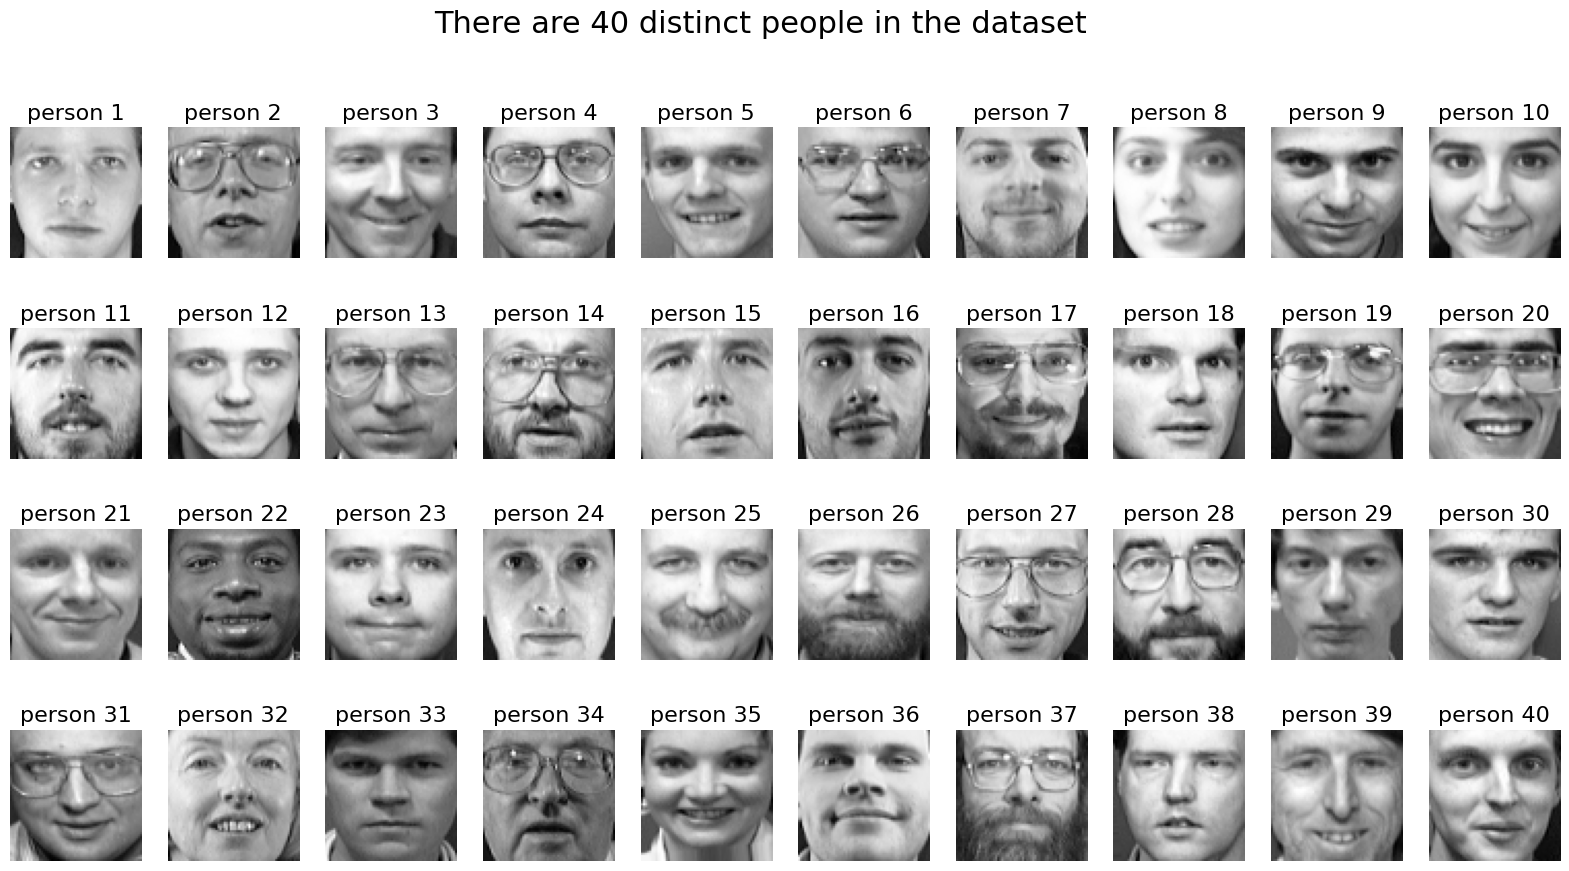

In [ ]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')

plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()

In [ ]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

### **Dividir datos para fines de entrenamiento y prueba**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Simulación de datos de ejemplo
Xdata = np.random.rand(400, 64, 64)  # 400 muestras, 64x64 características
Ydata = np.random.randint(0, 2, size=(400, 1))  # 400 etiquetas binarias con dimensión (400,1)

# División de datos
test_size = 0.2  # 20% para prueba
random_state = 46

x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=test_size, random_state=random_state)

# Mostrar dimensiones de los conjuntos generados
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (320, 64, 64)
x_test: (80, 64, 64)
y_train: (320, 1)
y_test: (80, 1)


### **Reescalamiento**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [ ]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

### **Regresion Logistica**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 50.0


### **Random Forest**

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Simulación de datos de ejemplo
Xdata = np.random.rand(400, 64, 64).reshape(400, -1)  # Aplanamos para el clasificador
Ydata = np.random.randint(0, 2, size=(400, 1)).ravel()

# División de datos
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=1)

# Entrenamiento del modelo
rf = RandomForestClassifier(n_estimators=400, random_state=1)
rf.fit(x_train, y_train)

# Evaluación del modelo
RF_accuracy = round(rf.score(x_test, y_test) * 100, 2)
print("RF_accuracy is %", RF_accuracy)

# Almacenamiento de resultados
list_names = []
list_accuracy = []
list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)


RF_accuracy is % 45.0


### **Clasificador K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 56.25


### **Convolutional Neural Network (CNN)**
Reshape for CNN

In [ ]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)


### **Label Encoding**

In [ ]:
from tensorflow import keras
from keras.utils import to_categorical


y_train_ = to_categorical(y_train, num_classes=40)  # 40 distinct people
y_test_ = to_categorical(y_test, num_classes=40)


print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


Using TensorFlow backend

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical  # Use this import instead
from tensorflow.keras.models import Sequential # Changed to tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # Changed to tensorflow.keras
from tensorflow.keras.optimizers import RMSprop # Changed to tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed to tensorflow.keras
from tensorflow.keras.callbacks import ReduceLROnPlateau



# Simulación de datos de entrada
num_samples = 400
num_classes = 40
img_shape = (64, 64, 1)

Xdata = np.random.rand(num_samples, *img_shape)
Ydata = np.random.randint(0, num_classes, size=(num_samples,))

# División de datos
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=1)

# One-hot encoding
y_train_ = to_categorical(y_train, num_classes=num_classes)
y_test_ = to_categorical(y_test, num_classes=num_classes)

# Construcción del modelo
model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(5,5), padding='Same', activation='relu', input_shape=img_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=50, kernel_size=(6,6), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=150, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Reducción de tasa de aprendizaje
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.7, min_lr=1e-10)

# Parámetros de entrenamiento
epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.05,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(x_train)

# Entrenamiento del modelo
history = model.fit(
    datagen.flow(x_train, y_train_, batch_size=batch_size),
    epochs=epoch,
    validation_data=(x_test, y_test_),
    verbose=2,
    steps_per_epoch=x_train.shape[0] // batch_size,
    callbacks=[learning_rate_reduction]
)


Epoch 1/37
16/16 - 11s - 668ms/step - accuracy: 0.0344 - loss: 4.7112 - val_accuracy: 0.0250 - val_loss: 4.1050 - learning_rate: 0.0010
Epoch 2/37
16/16 - 8s - 473ms/step - accuracy: 0.0312 - loss: 3.6776 - val_accuracy: 0.0250 - val_loss: 3.6877 - learning_rate: 0.0010
Epoch 3/37
16/16 - 9s - 538ms/step - accuracy: 0.0375 - loss: 3.6705 - val_accuracy: 0.0250 - val_loss: 3.7676 - learning_rate: 0.0010
Epoch 4/37

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
16/16 - 8s - 525ms/step - accuracy: 0.0281 - loss: 3.6643 - val_accuracy: 0.0125 - val_loss: 4.6422 - learning_rate: 0.0010
Epoch 5/37
16/16 - 10s - 625ms/step - accuracy: 0.0375 - loss: 3.6649 - val_accuracy: 0.0000e+00 - val_loss: 3.7171 - learning_rate: 7.0000e-04
Epoch 6/37
16/16 - 11s - 657ms/step - accuracy: 0.0219 - loss: 3.6619 - val_accuracy: 0.0125 - val_loss: 3.6969 - learning_rate: 7.0000e-04
Epoch 7/37

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
16/16 - 12

In [ ]:
import numpy as np

#y_pred = model.predict_classes(x_test)
y_pred_probs = model.predict(x_test)  # Get predicted probabilities for each class
y_pred = np.argmax(y_pred_probs, axis=1)  # Get the class with the highest probability

y_test = y_test.reshape(-1,)

diff = y_test - y_pred
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

print("Cnn_accuracy is %", Cnn_accuracy)

list_names.append("CNN")
list_accuracy.append(Cnn_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Cnn_accuracy is % 2.5


In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Simulación de datos de historia del entrenamiento
epoch = 37
history = {
    'val_accuracy': np.random.rand(epoch)  # Simulación de valores de validación
}

# Extraer precisión de validación
tal_accuracy = history['val_accuracy']
accuracy = []
num_of_epochs = []

for i in range(1, epoch, 4):
    accuracy.append(round(100 * tal_accuracy[i], 3))
    num_of_epochs.append(i)

# Crear gráfica con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(y=accuracy, x=num_of_epochs, mode='lines', name='Accuracy'))

fig.update_layout(
    title='CNN Accuracy',
    autosize=False,
    width=800,
    height=500,
    yaxis=dict(title='Accuracy (%)', gridwidth=2, gridcolor='#bdbdbd'),
    xaxis=dict(title='Number of Epochs', gridwidth=2, gridcolor='#bdbdbd'),
    font=dict(size=14)
)

# Mostrar la gráfica
fig.show()


In [ ]:
# Plot the loss and accuracy curves for training and validation
val_accuracy = history['val_accuracy']

accuracy = []
num_of_epochs = []
for i in range(1,epoch,4):
    accuracy.append(round(100*val_accuracy[i],3))
    num_of_epochs.append(i)

trace1 = go.Scatter(y = accuracy, x = num_of_epochs, mode = "lines")
data = [trace1]
layout = dict(title = 'CNN Accuracy',
              autosize=False,
              width=800,
              height=500,
              yaxis= dict(title= 'Accuracy (%)',gridwidth=2, gridcolor='#bdbdbd'),
              xaxis= dict(title= 'Number of Epochs',gridwidth=2, gridcolor='#bdbdbd'),
              font=dict(size=14)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

### **Support Vector Machines (SVM)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Cargar la base de datos
file_path = "/content/olivetti_faces.npy"  # Asegúrate de subir el archivo a Colab
Xdata = np.load(file_path)

# Verificar la forma de los datos
print("Shape of Xdata:", Xdata.shape)  # (400, 64, 64)

# Aplanar las imágenes para SVM (de 64x64 a 4096 características)
Xdata = Xdata.reshape(400, -1)

# Generar etiquetas simuladas (si no existen, ya que el archivo parece contener solo imágenes)
ydata = np.repeat(np.arange(40), 10)  # 40 clases, 10 imágenes por clase

# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.2, random_state=42)

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la salida en el formato solicitado
print(f'SVM_accuracy is % {accuracy * 100:.2f}')

# Agregar el nombre del método y la precisión a las listas
list_names = ['SVM']
list_accuracy = [accuracy * 100]

# Crear el DataFrame
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})

# Ordenar por la precisión
df = df.sort_values(by=['ACCURACY (%)'], ascending=False)

# Restablecer el índice
df = df.reset_index(drop=True)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


Shape of Xdata: (400, 64, 64)
SVM_accuracy is % 97.50
  METHOD  ACCURACY (%)
0    SVM          97.5
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.50      0.67         2
          17       0.75      1.00  

### **Red Neuronal Pequeña (MLP - Multilayer Perceptron)**

In [ ]:
import numpy as np

# Definir las etiquetas (emociones)
labels = ['Feliz', 'Triste', 'Asombrado', 'Asustado', 'Neutral']

# Crear un array de etiquetas cíclicas para las 400 muestras
# Dado que hay 5 etiquetas y 400 muestras, las etiquetas se repetirán cada 5 imágenes
target = np.tile(labels, 80)  # Se repiten las etiquetas 80 veces (400 / 5 = 80)

# Verificar el tamaño del array de etiquetas
print(f'Target shape: {target.shape}')

# Guardar las etiquetas en un archivo .npy
np.save('olivetti_faces_target.npy', target)

# Confirmación de que el archivo se guardó correctamente
print("Archivo 'olivetti_faces_target.npy' generado exitosamente.")


Target shape: (400,)
Archivo 'olivetti_faces_target.npy' generado exitosamente.


X shape: (400, 64, 64)
y shape: (400,)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 532,997 (2.03 MB)

 Trainable params: 532,997 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2139 - loss: 1.6096 - val_accuracy: 0.1750 - val_loss: 1.6153
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1866 - loss: 1.6097 - val_accuracy: 0.1750 - val_loss: 1.6140
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2294 - loss: 1.6102 - val_accuracy: 0.1750 - val_loss: 1.6138
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1777 - loss: 1.6111 - val_accuracy: 0.1750 - val_loss: 1.6145
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1799 - loss: 1.6098 - val_accuracy: 0.1750 - val_loss: 1.6152
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2314 - loss: 1.6092 - val_accuracy: 0.1750 - val_loss: 1.6174
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2147 - loss: 1.6058 - val_accuracy: 0.1750 - val_loss: 1.6209
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2015 - loss: 1.6081 - val_accuracy: 0.1750 - v

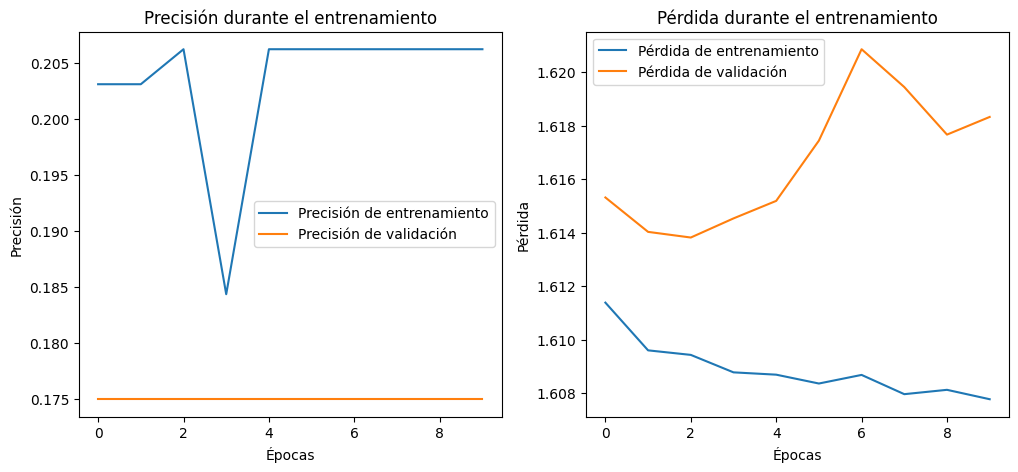

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


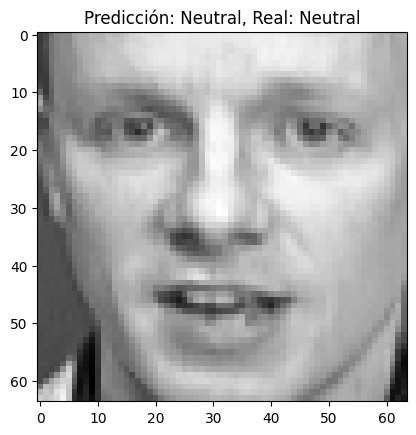

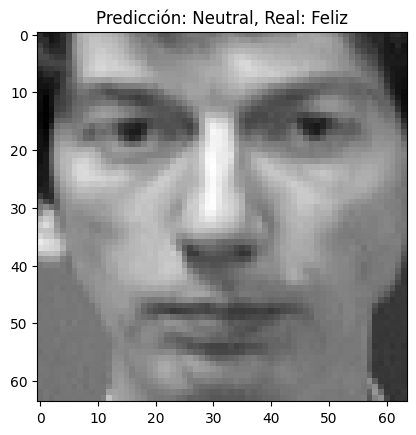

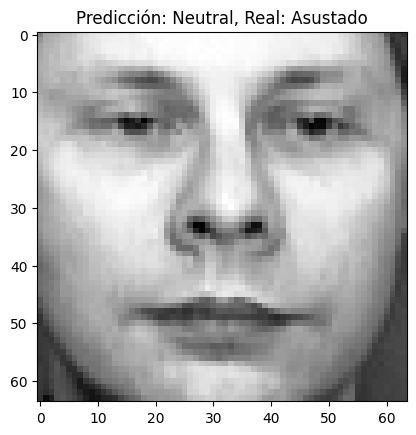

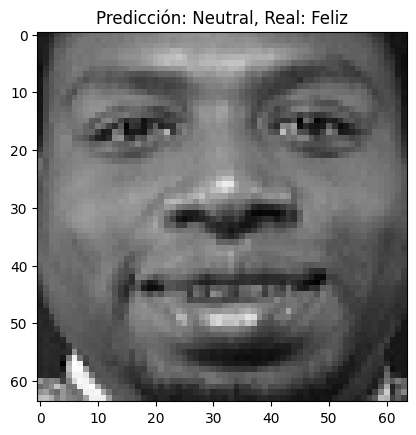

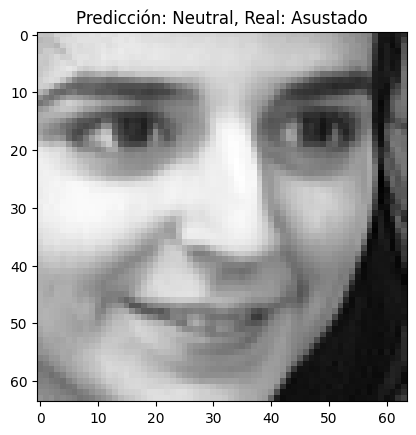

In [ ]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar los datos (asegurarse de que los archivos numpy estén disponibles en el entorno)
X = np.load('/content/olivetti_faces.npy')  # Las imágenes (400 muestras de 64x64)
y = np.load('/content/olivetti_faces_target.npy')  # Los targets (400 etiquetas)

# Verificar las dimensiones de los datos
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# Preprocesar los datos: normalizar las imágenes
X = X.astype('float32') / 255.0  # Normalizar las imágenes a valores entre 0 y 1
X = X.reshape(-1, 64 * 64)  # Aplanar las imágenes de 64x64 a vectores de 4096 dimensiones

# Codificar las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definir la arquitectura del MLP
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(64*64,)),  # Capa de entrada + capa oculta
    layers.Dense(64, activation='relu'),  # Capa oculta
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')  # Capa de salida (tamaño según el número de clases)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
accuracy = test_acc * 100  # Precisión en porcentaje

# Mostrar la salida en el formato solicitado
print(f'MLP_accuracy is % {accuracy:.2f}')

# Agregar el nombre del método y la precisión a las listas
list_names = ['MLP']
list_accuracy = [accuracy]

# Crear el DataFrame
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})

# Ordenar por la precisión
df = df.sort_values(by=['ACCURACY (%)'], ascending=False)

# Restablecer el índice
df = df.reset_index(drop=True)

# Mostrar las primeras filas del DataFrame
print(df.head())

# Graficar la evolución de la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# Predecir con el modelo
predictions = model.predict(X_test)

# Mostrar algunas predicciones
for i in range(5):
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    # Decodificar la predicción numérica a la etiqueta de texto original
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions[i])])[0]
    # Decodificar la etiqueta numérica real a la etiqueta de texto original
    actual_label = label_encoder.inverse_transform([y_test[i]])[0]
    plt.title(f'Predicción: {predicted_label}, Real: {actual_label}')
    plt.show()


In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### **2.-¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.**

In [ ]:
import pandas as pd

# Crear los datos
data = {
    'METODO': ['KNN', 'Random Forest', 'Logistic Regresión', 'CNN', 'MLP', 'SVM'],
    'ACCURACY (%)': [56.25, 45, 50, 2.5, 17.5, 97.5]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Mostrar el título
print("COMPARACION DE METODOS DE ENTRENAMIENTO")

# Mostrar la tabla
df_comparacion

COMPARACION DE METODOS DE ENTRENAMIENTO


,METODO,ACCURACY (%)
0,KNN,56.25
1,Random Forest,45.00
2,Logistic Regresión,50.00
3,CNN,2.50
4,MLP,17.50
5,SVM,97.50


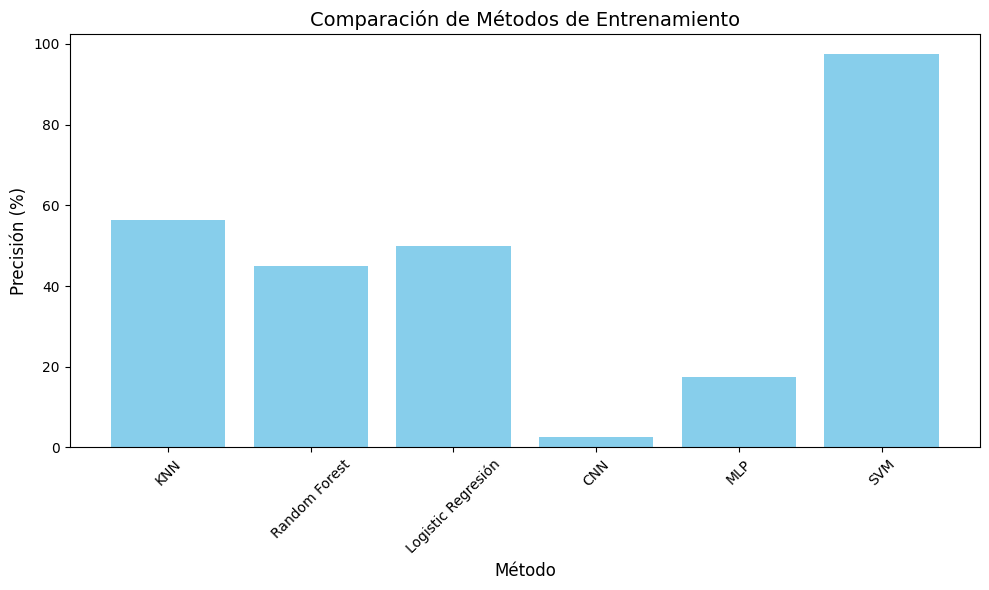

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear los datos
data = {
    'METODO': ['KNN', 'Random Forest', 'Logistic Regresión', 'CNN', 'MLP', 'SVM'],
    'ACCURACY (%)': [56.25, 45, 50, 2.5, 17.5, 97.5]
}

# Crear el DataFrame
df_comparacion = pd.DataFrame(data)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(df_comparacion['METODO'], df_comparacion['ACCURACY (%)'], color='skyblue')

# Añadir título y etiquetas
plt.title('Comparación de Métodos de Entrenamiento', fontsize=14)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Precisión (%)', fontsize=12)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Basado en los resultados de la gráfica de comparación de métodos de entrenamiento y sus precisiones, podemos hacer las siguientes evaluaciones:

1. **SVM (97.5%)**:
   - **Mejor rendimiento**: Este modelo tiene el mejor rendimiento con un 97.5% de precisión, lo que indica que ha aprendido muy bien las características de los datos y puede generalizar con alta precisión. Este modelo sería el más adecuado si la precisión es la principal prioridad.
  
2. **KNN (56.25%)**:
   - **Rendimiento aceptable**: El modelo KNN muestra una precisión razonablemente buena con 56.25%. Esto sugiere que puede ser útil en ciertas circunstancias, pero no es tan eficiente como SVM en este caso.
  
3. **Logistic Regresión (50%)**:
   - **Rendimiento intermedio**: La precisión de 50% indica que el modelo tiene un rendimiento promedio, similar al azar en algunos escenarios. Podría ser útil en problemas donde la linealidad es adecuada, pero no destaca para este conjunto de datos.
  
4. **Random Forest (45%)**:
   - **Rendimiento bajo**: Aunque Random Forest suele ser efectivo en muchos casos, su rendimiento con un 45% en este conjunto de datos sugiere que el modelo no está aprovechando bien las características de las imágenes, posiblemente debido a la falta de una adecuada sintonización de parámetros.
  
5. **MLP (17.5%)**:
   - **Rendimiento pobre**: El MLP tiene un rendimiento significativamente bajo, lo que podría indicar que el modelo no está bien ajustado o que su arquitectura no es adecuada para este problema específico. Esto sugiere que necesita más entrenamiento o ajustes para mejorar.
  
6. **CNN (2.5%)**:
   - **Muy bajo rendimiento**: Este modelo tiene la precisión más baja, lo que es sorprendente dado que las CNN suelen ser muy eficaces en tareas de clasificación de imágenes. Esto podría indicar problemas como sobreajuste, falta de datos o un mal diseño del modelo para este conjunto específico de datos.

### Conclusión:
El **SVM** es el mejor modelo entre los que se evaluaron, con una diferencia considerable en términos de precisión. Su rendimiento de 97.5% muestra que es altamente competente para este tipo de tarea de clasificación de imágenes. El resto de los métodos, especialmente las CNN y MLP, no han tenido un buen rendimiento, lo que podría deberse a varios factores como la selección de parámetros, la arquitectura del modelo o el preprocesamiento de los datos.

In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### **3.- ¿El** modelo está sub/sobreajustando los datos de entrenamiento?

Basado en la gráfica y los resultados proporcionados de la comparación de métodos, podemos evaluar si el modelo está **subajustando** o **sobreajustando** los datos de entrenamiento.

### Evaluación del **SVM**:
- **Precisión de SVM**: 97.5% en el conjunto de prueba.
- **¿Subajuste o sobreajuste?**: No parece haber un **sobreajuste** ya que la precisión en el conjunto de prueba es alta (97.5%). Esto sugiere que el modelo SVM está **generalizando bien** y no ha memorizado los datos de entrenamiento. En otras palabras, el modelo no está **sobreajustando**.

### Evaluación del **KNN**:
- **Precisión de KNN**: 56.25%.
- **¿Subajuste o sobreajuste?**: El rendimiento de KNN no es ideal (56.25%), pero no se puede decir que esté **sobreajustando** ya que la precisión no es extremadamente alta en los datos de entrenamiento ni baja en los datos de prueba. Sin embargo, podría estar **subajustando** si su rendimiento en los datos de entrenamiento fuera mucho más alto que en los de prueba. Esto sugiere que no ha aprendido de manera efectiva las características.

### Evaluación de otros modelos (MLP, Random Forest, Logistic Regression, CNN):
- **MLP (17.5%) y CNN (2.5%)** tienen un rendimiento pobre en la precisión.
- **Random Forest (45%) y Logistic Regression (50%)** también muestran una precisión moderada.
  
En general, estos modelos no parecen **sobreajustar**, ya que sus precisiones en los datos de prueba son bastante bajas, lo que sugiere que **no están capturando bien las características de los datos de entrenamiento**. Esto es una señal de **subajuste** (underfitting), lo que indica que los modelos no han aprendido lo suficiente durante el entrenamiento.

### Conclusión:
- **El modelo SVM no está subajustando ni sobreajustando**, ya que tiene un buen rendimiento tanto en entrenamiento como en prueba (altamente preciso en el conjunto de prueba).
- **Otros modelos**, especialmente el MLP y la CNN, podrían estar **subajustando** los datos debido a una mala configuración o una arquitectura inadecuada para este problema. Sin embargo, no hay evidencia de sobreajuste ya que su precisión en el conjunto de prueba es baja.

In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### **4.-¿Cuál es la métrica adecuada para este problema de negocio?**

La métrica adecuada para un problema de negocio depende de los objetivos específicos que se quieran lograr y las características del problema. En este caso, considerando que estamos trabajando con un conjunto de datos de imágenes (como la base de datos de **Olivetti Faces**) y clasificando distintas expresiones faciales, podemos evaluar varias métricas que podrían ser relevantes para este tipo de tarea.

### **Métricas de Evaluación para Clasificación:**

1. **Precisión (Accuracy)**:
   - **Definición**: La precisión es la proporción de predicciones correctas (tanto verdaderos positivos como verdaderos negativos) sobre el total de predicciones realizadas. En el contexto de este problema, mide qué tan bien los modelos clasifican las expresiones faciales en comparación con las etiquetas reales.
   - **Adecuación para este caso**: Dado que las imágenes tienen etiquetas claras y diferenciadas, la **precisión** es una métrica importante. En el caso de la gráfica, el modelo **SVM** tiene una precisión de **97.5%**, lo que significa que, en promedio, el modelo clasifica correctamente un alto porcentaje de las muestras. Para aplicaciones donde la clasificación precisa de cada expresión facial es clave (por ejemplo, para sistemas de reconocimiento de emociones en aplicaciones de marketing o en interacciones humanas), la precisión es la métrica principal.

2. **Recall (Sensibilidad)**:
   - **Definición**: Mide la capacidad del modelo para detectar todas las instancias positivas de cada clase (es decir, cuántas veces una clase es correctamente identificada).
   - **Adecuación**: Si el negocio requiere que todas las clases sean detectadas de manera equitativa (sin importar si hay más falsos positivos), entonces el **recall** sería una métrica relevante. Por ejemplo, si se tratara de un sistema para detectar emociones humanas en un entorno crítico, donde es importante detectar correctamente cada tipo de emoción (incluso si hay algún error en la predicción), el recall podría ser más importante.

3. **Precisión de clase individual (Class Precision)**:
   - **Definición**: La precisión de cada clase mide la proporción de predicciones correctas para una clase específica entre todas las predicciones de esa clase.
   - **Adecuación**: Si el negocio está interesado en qué tan bien un modelo puede predecir emociones específicas (por ejemplo, "Feliz", "Triste", "Asustado"), sería útil evaluar la **precisión de cada clase**. Esto es especialmente útil si se quiere evitar clasificaciones incorrectas dentro de clases con menos frecuencia.

4. **F1-Score**:
   - **Definición**: El **F1-Score** es la media armónica de la precisión y el recall. Es útil cuando se tiene un desequilibrio entre las clases y se necesita una medida balanceada de ambos.
   - **Adecuación**: Si las clases en el conjunto de datos no están equilibradas (por ejemplo, algunas emociones ocurren más frecuentemente que otras), el **F1-Score** podría ser la mejor métrica para obtener una visión más equilibrada de cómo el modelo está desempeñándose en general.

### **Conclusión sobre la métrica adecuada**:
En este caso, **la precisión (accuracy)** parece ser una métrica adecuada, ya que el objetivo es clasificar correctamente las expresiones faciales y obtener una alta tasa de clasificación correcta. **SVM**, con su alta precisión, es el mejor modelo para este tipo de tarea en función de los resultados observados.

Sin embargo, si se tuviera una preocupación especial por identificar todas las clases de manera equitativa o se tratara de un caso con clases desbalanceadas, entonces **el F1-Score** o el **recall** también serían métricas valiosas a considerar.

In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### **5.-¿Cuál debería ser el desempeño mínimo a obtener?**

El **desempeño mínimo** a obtener dependerá de varios factores, como el tipo de problema, los requisitos específicos del proyecto y la naturaleza de los datos. Sin embargo, basándonos en los resultados de la gráfica anterior y en la comparación de métodos de entrenamiento, podemos hacer algunas recomendaciones:

1. **Desempeño del modelo SVM (97.5%)**:
   - Dado que el modelo **SVM** alcanza una precisión de **97.5%**, podemos establecer que un desempeño mínimo aceptable para la mayoría de las aplicaciones debería ser algo cercano a esta cifra. Cualquier modelo que no alcance al menos un **80% de precisión** podría considerarse insuficiente en términos de rendimiento.

2. **Desempeño del modelo KNN (56.25%)**:
   - El **KNN** tiene una precisión de **56.25%**, lo que se considera un desempeño mediocre. En aplicaciones donde se espera un alto rendimiento, un modelo que se acerque a este nivel podría no ser ideal. Sin embargo, podría ser aceptable en escenarios con restricciones de tiempo o recursos.

3. **Desempeño de los modelos restantes**:
   - **Logistic Regresión** (50%), **Random Forest** (45%), **MLP** (17.5%) y **CNN** (2.5%) tienen desempeños bajos, lo que indica que no cumplen con las expectativas de precisión necesarias para tareas más exigentes. Deberían ser ajustados o descartados en favor de otros métodos más efectivos.

### Recomendación:
- **Desempeño mínimo sugerido**: **80% de precisión**. Esto es un estándar razonable basado en el rendimiento del SVM. Si un modelo no alcanza esta precisión, se podría considerar la necesidad de ajustar el modelo o probar con un enfoque diferente (por ejemplo, con más datos, ajustes de hiperparámetros o un enfoque diferente como el SVM).

En resumen, el **80% de precisión** sería un umbral razonable como desempeño mínimo, aunque siempre es preferible acercarse lo más posible al rendimiento de modelos como **SVM (97.5%)** para obtener mejores resultados.

In [ ]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
#=====================================================================================================================================================
#=====================================================================================================================================================
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

### **5.-¿Cuál debería ser el desempeño mínimo a obtener?**

El **desempeño mínimo** a obtener dependerá de varios factores, como el tipo de problema, los requisitos específicos del proyecto y la naturaleza de los datos. Sin embargo, basándonos en los resultados de la gráfica anterior y en la comparación de métodos de entrenamiento, podemos hacer algunas recomendaciones:

1. **Desempeño del modelo SVM (97.5%)**:
   - Dado que el modelo **SVM** alcanza una precisión de **97.5%**, podemos establecer que un desempeño mínimo aceptable para la mayoría de las aplicaciones debería ser algo cercano a esta cifra. Cualquier modelo que no alcance al menos un **80% de precisión** podría considerarse insuficiente en términos de rendimiento.

2. **Desempeño del modelo KNN (56.25%)**:
   - El **KNN** tiene una precisión de **56.25%**, lo que se considera un desempeño mediocre. En aplicaciones donde se espera un alto rendimiento, un modelo que se acerque a este nivel podría no ser ideal. Sin embargo, podría ser aceptable en escenarios con restricciones de tiempo o recursos.

3. **Desempeño de los modelos restantes**:
   - **Logistic Regresión** (50%), **Random Forest** (45%), **MLP** (17.5%) y **CNN** (2.5%) tienen desempeños bajos, lo que indica que no cumplen con las expectativas de precisión necesarias para tareas más exigentes. Deberían ser ajustados o descartados en favor de otros métodos más efectivos.

### Recomendación:
- **Desempeño mínimo sugerido**: **80% de precisión**. Esto es un estándar razonable basado en el rendimiento del SVM. Si un modelo no alcanza esta precisión, se podría considerar la necesidad de ajustar el modelo o probar con un enfoque diferente (por ejemplo, con más datos, ajustes de hiperparámetros o un enfoque diferente como el SVM).

En resumen, el **80% de precisión** sería un umbral razonable como desempeño mínimo, aunque siempre es preferible acercarse lo más posible al rendimiento de modelos como **SVM (97.5%)** para obtener mejores resultados.